  Machine Learning Online Class
  Exercise 1: Linear regression with multiple variables

# Instructions

 
  This file contains code that helps you get started on the
  linear regression exercise. 

  You will need to complete the following functions in this 
  exericse:

     feature_normalize()
     compute_cost_multi()
     gradient_descent_multi!()
     normal_eqn()

  For this part of the exercise, you will need to change some
  parts of the code below for various experiments (e.g., changing
  learning rates).


In [1]:
using Plots
gr()

Plots.GRBackend()

# User function definitions

In [2]:
function feature_normalize(X)
    #   feature_normalize returns a normalized version of X where
    #   the mean value of each feature is 0 and the standard deviation
    #   is 1. This is often a good preprocessing step to do when
    #   working with learning algorithms.

    # You need to set these values correctly
    X_norm = zeros(X)
    mu = zeros(size(X, 2))
    sigma = zeros(size(X, 2))
    
    # Instructions: First, for each feature dimension, compute the mean
    #               of the feature and subtract it from the dataset,
    #               storing the mean value in mu. Next, compute the 
    #               standard deviation of each feature and divide
    #               each feature by it's standard deviation, storing
    #               the standard deviation in sigma. 
    #
    #               Note that X is a matrix where each column is a 
    #               feature and each row is an example. You need 
    #               to perform the normalization separately for 
    #               each feature.
    #
    # Hint: You might find the built in 'mean' and 'std' functions useful.
    
    # ====================== YOUR CODE HERE ======================
    mu = mean(X, 1)
    sigma = std(X, 1)
    X_norm = (X .- mu) ./ sigma
    # ============================================================
    return X_norm, mu, sigma
end


function compute_cost_multi(X, y, theta)
  # Compute cost for linear regression
  # Computes the cost J of using theta as the
  # parameter for linear regression to fit the data points in X and y

  # Instructions: Compute the cost of a particular choice of theta
  #               You should set J to the cost.
  
  # Initialize some useful values, such as the number of training examples m.
  m = length(y)


  # ====================== YOUR CODE HERE ======================
  h = X * theta;
  J = 1/(2*m) * sum((h .- y).^2)
  # ============================================================
  return J
end


function gradient_descent_multi!(theta, X, y, alpha, num_iters)
    
    # Initialize some useful values
    m, n = size(X)
    J_history = zeros(num_iters)
    d_theta = zeros(n)
    
    # Hint: Perform a loop over num_iters and fill in values 
    #       J_history[iter] = compute_cost_multi(X, y, theta)


    # ====================== YOUR CODE HERE ======================
    for iter in 1:num_iters
        h = X * theta

        for j in 1:n
              x = X[: ,j]
              d_theta[j] = -alpha/m * sum((h .- y) .* x)
        end
        theta[:,:] += d_theta
        J_history[iter] = compute_cost_multi(X, y, theta)
    end
    # ============================================================

    return J_history
end


function normal_eqn(X, y)
    # ====================== YOUR CODE HERE ======================
    theta = pinv(X' * X) * X' * y;
    # ============================================================
end

normal_eqn (generic function with 1 method)

# Part 1: Feature Normalization
Complete the code in **feature_normalize()** to compute the normalized data set X, its mean mu, and standard deviation sigma.

In [3]:
## Load Data
data = readdlm("ex1data2.txt", ',')
x = data[:, 1:2]
y = data[:, 3]
m = length(y)

# Print out some data points
println("First 10 examples from the dataset:")
x[1:10, :]

First 10 examples from the dataset:


10×2 Array{Float64,2}:
 2104.0  3.0
 1600.0  3.0
 2400.0  3.0
 1416.0  2.0
 3000.0  4.0
 1985.0  4.0
 1534.0  3.0
 1427.0  3.0
 1380.0  3.0
 1494.0  3.0

In [4]:
x_norm, mu, sigma = feature_normalize(x)

# Add intercept term to x_norm
X = [ones(m) x_norm];

# Part 2: Gradient Descent
Complete the code in **gradient_descent_multi()**. In a first step you must be able to compute the cost for multi dimensional X, **compute_cost_multi()**. If necessary adapt the *compute_cost(_)* function from ex1.ipynb such that it can handle multi dimensional X.

In a second step write up the code to perform gradient descent on this data in function *gradient_descent_multi!()*. The exclamation point at the end of the function name is a Julia convention for in-place functions. This means that functions ending with ! modify one or more of their input parameters. In this case you should write up code that modifies the input parameter theta. As a hint you can orient yourself at the version of gradient descent in *grad_descent.jl*, but now make a call to your *compute_cost_multi()* function that you implemented before.

In [5]:
# Choose some alpha value
alpha = 0.03;
num_iters = 400;

# Init Theta and Run Gradient Descent
theta = zeros(3, 1);
J_history = gradient_descent_multi!(theta, X, y, alpha, num_iters);
@show(theta);

theta = [3.40411e5; 1.10308e5; -6326.54]


/home/abieler/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))



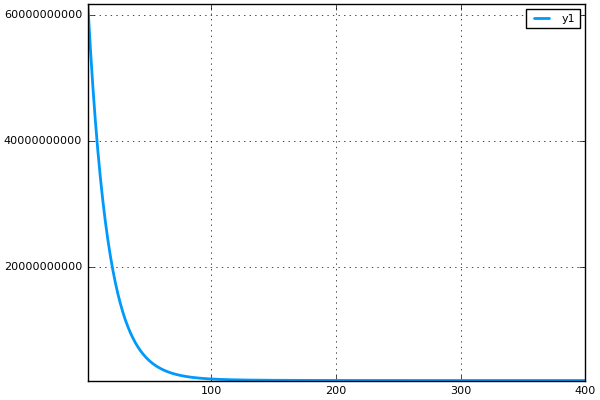

In [6]:
plot(J_history, width=2, show=true)

In [7]:
# Estimate the price of a 1650 sq-ft, 3 br house
# Recall that the first column of X is all-ones. Thus, it does
# not need to be normalized.

price = 0  # You should change this

# ====================== YOUR CODE HERE ======================
x_new = [1650.0, 3.0]'
x_new = (x_new .- mu) ./ sigma
x_new = [1 x_new]
price = dot(x_new, theta)
# ============================================================

println("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $price");

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): 293149.9943294969


# Part 3: Normal Equations

Instructions: The following code computes the closed form solution for linear regression using the normal equations. You should complete the code in **normal_eqn()** After doing so, you should complete this code to predict the price of a 1650 sq-ft, 3 br house.

In [8]:
# Load Data
data = readdlm("ex1data2.txt", ',')
X = data[:, 1:2]
y = data[:, 3]
m = length(y)

# Add intercept term to X
X = [ones(m) X];

theta = normal_eqn(X, y)
x_new = [1, 1650, 3]
price = dot(x_new, theta)

@show(theta)
println("Predicted price of a 1650 sq-ft, 3 br house (using normal eqn): $price");

theta = [89597.9,139.211,-8738.02]
Predicted price of a 1650 sq-ft, 3 br house (using normal eqn): 293081.4643349723
